<a href="https://colab.research.google.com/github/Minhhhh29/AI_1/blob/main/BTVN2_CNN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn đến folder ảnh chứa 2 thư mục con: Nghi và Minh
image_folder = '/content/drive/MyDrive/nhandienkhuonmat'

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import os # Thêm thư viện os để kiểm tra đường dẫn

# --- Cấu hình ---
# Đường dẫn đến thư mục CHÍNH chứa tất cả các lớp ảnh
MAIN_DATA_DIR = '/content/drive/MyDrive/nhandienkhuonmat'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2 # Tỷ lệ dữ liệu dùng cho validation (ví dụ: 20%)
EPOCHS = 5
# ----------------

# Kiểm tra xem thư mục dữ liệu chính có tồn tại không
if not os.path.exists(MAIN_DATA_DIR):
    print(f"Lỗi: Không tìm thấy thư mục dữ liệu tại '{MAIN_DATA_DIR}'")
    exit() # Thoát nếu không tìm thấy thư mục

# Tạo MỘT ImageDataGenerator duy nhất với validation_split
# Augmentation chỉ áp dụng cho tập train, rescale áp dụng cho cả hai.
datagen = ImageDataGenerator(
    rescale=1./255,             # Chuẩn hóa pixel (áp dụng cho cả train và validation)
    validation_split=VALIDATION_SPLIT, # Chỉ định tỷ lệ tách validation
    # Các tham số augmentation chỉ được áp dụng cho tập 'training'
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Tạo trình tạo dữ liệu huấn luyện (training generator)
print(f"Tạo trình tạo dữ liệu huấn luyện từ: {MAIN_DATA_DIR}")
train_generator = datagen.flow_from_directory(
    MAIN_DATA_DIR,              # Đường dẫn đến thư mục chính
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'           # Chỉ định đây là tập huấn luyện
)

# Tạo trình tạo dữ liệu xác thực (validation generator)
print(f"Tạo trình tạo dữ liệu xác thực từ: {MAIN_DATA_DIR}")
validation_generator = datagen.flow_from_directory(
    MAIN_DATA_DIR,              # Đường dẫn đến thư mục chính (CÙNG THƯ MỤC!)
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',        # Chỉ định đây là tập xác thực
    shuffle=False               # Thường không cần xáo trộn tập validation
)

# Lấy số lượng lớp từ train_generator
num_classes = train_generator.num_classes
print(f"Số lớp được tìm thấy: {num_classes}")
print(f"Các lớp: {list(train_generator.class_indices.keys())}") # In tên các lớp (thư mục con)


# Kiến trúc mạng (giữ nguyên hoặc điều chỉnh nếu cần)
# Đảm bảo lớp Dense cuối cùng có số units = num_classes
model = Sequential()
# Input Layer (nên thêm tường minh)
model.add(Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
# Bộ 1 Convolution
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Bộ 2 Convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
# Bộ 3 Convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
# ANN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# Lớp Dense cuối cùng phải khớp với số lớp tìm thấy
model.add(Dense(num_classes, activation='softmax')) # <--- Sửa số lớp ở đây

model.summary() # In cấu trúc model để kiểm tra

# Biên dịch mô hình
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Huấn luyện mô hình (sử dụng model.fit thay vì model.fit_generator vì nó đã hỗ trợ generator)
print("\nBắt đầu huấn luyện...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    # steps_per_epoch và validation_steps thường được tự động tính toán
    # nhưng bạn có thể chỉ định nếu muốn:
    # steps_per_epoch=train_generator.samples // BATCH_SIZE,
    # validation_steps=validation_generator.samples // BATCH_SIZE
)

print("\nHuấn luyện hoàn tất!")

# Lưu mô hình
model_save_path = 'nhandangkhuanmat_auto_split.h5'
model.save(model_save_path)
print(f"Đã lưu mô hình vào: {model_save_path}")

# (Tùy chọn) Lưu tên lớp để sử dụng sau này khi dự đoán
class_indices_path = 'class_indices.npy'
np.save(class_indices_path, train_generator.class_indices)
print(f"Đã lưu chỉ số lớp vào: {class_indices_path}")

Tạo trình tạo dữ liệu huấn luyện từ: /content/drive/MyDrive/nhandienkhuonmat
Found 556 images belonging to 8 classes.
Tạo trình tạo dữ liệu xác thực từ: /content/drive/MyDrive/nhandienkhuonmat
Found 136 images belonging to 8 classes.
Số lớp được tìm thấy: 8
Các lớp: ['Minh đang Buồn', 'Minh đang Tức Giận', 'Minh đang Vui', 'Minh đang Wow', 'Nghi đang Buồn', 'Nghi đang Tức Giận', 'Nghi đang Vui', 'Nghi đang Wow']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,773,448 (98.32 MB)

 Trainable params: 25,773,448 (98.32 MB)

 Non-trainable params: 0 (0.00 B)


Bắt đầu huấn luyện...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 326s 18s/step - accuracy: 0.1983 - loss: 2.5281 - val_accuracy: 0.4265 - val_loss: 1.4603
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.4096 - loss: 1.3739 - val_accuracy: 0.5000 - val_loss: 1.0928
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.4798 - loss: 1.1094 - val_accuracy: 0.6471 - val_loss: 0.9269
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.5749 - loss: 0.9756 - val_accuracy: 0.5221 - val_loss: 0.9475
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.6371 - loss: 0.8263 - val_accuracy: 0.6985 - val_loss: 0.8074



Huấn luyện hoàn tất!
Đã lưu mô hình vào: nhandangkhuanmat_auto_split.h5
Đã lưu chỉ số lớp vào: class_indices.npy


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Dự đoán: Minh đang cảm thấy buồn


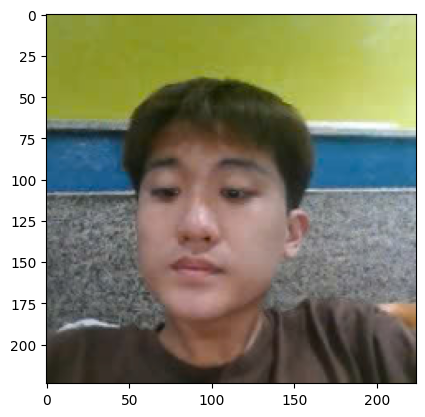

In [22]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
# **Lưu mô hình đã huấn luyện**
model = load_model('/content/nhandangkhuanmat_auto_split.h5')

# **Hàm dự đoán loài hoa**
def predict_flower(image_path):
  img = load_img(image_path, target_size=(224, 224))  # Đảm bảo kích thước ảnh giống với huấn luyện
  img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
  img_batch = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho phù hợp với đầu vào mô hình

  predictions = model.predict(img_batch)  # Dự đoán xác suất của các lớp
  predicted_class = np.argmax(predictions[0])  # Lấy lớp có xác suất cao nhất

  # Hiển thị kết quả dự đoán (tùy chỉnh theo tên lớp trong train_generator.class_indices)
  class_names = ['Minh đang cảm thấy buồn', 'Minh đang cảm thấy giận','Minh đang cảm thấy vui', 'Minh đang cảm thấy wow', 'Nghi đang cảm thấy buồn', 'Nghi đang cảm thấy giận', 'Nghi đang cảm thấy vui', 'Nghi đang cảm thấy wow']
  print('Dự đoán: {}'.format(class_names[predicted_class]))
  plt.imshow(img)
  plt.show()
# **Ví dụ sử dụng**
image_path = '/content/Minhbuon.jpg'
predict_flower(image_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Dự đoán: Minh đang cảm thấy giận


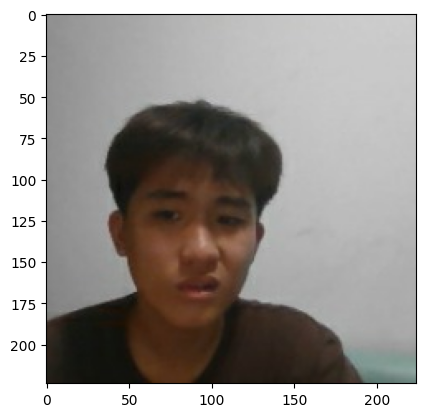

In [23]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
# **Lưu mô hình đã huấn luyện**
model = load_model('/content/nhandangkhuanmat_auto_split.h5')

# **Hàm dự đoán loài hoa**
def predict_flower(image_path):
  img = load_img(image_path, target_size=(224, 224))  # Đảm bảo kích thước ảnh giống với huấn luyện
  img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
  img_batch = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho phù hợp với đầu vào mô hình

  predictions = model.predict(img_batch)  # Dự đoán xác suất của các lớp
  predicted_class = np.argmax(predictions[0])  # Lấy lớp có xác suất cao nhất

  # Hiển thị kết quả dự đoán (tùy chỉnh theo tên lớp trong train_generator.class_indices)
  class_names = ['Minh đang cảm thấy buồn', 'Minh đang cảm thấy giận','Minh đang cảm thấy vui', 'Minh đang cảm thấy wow', 'Nghi đang cảm thấy buồn', 'Nghi đang cảm thấy giận', 'Nghi đang cảm thấy vui', 'Nghi đang cảm thấy wow']
  print('Dự đoán: {}'.format(class_names[predicted_class]))
  plt.imshow(img)
  plt.show()
# **Ví dụ sử dụng**
image_path = '/content/20.jpg'
predict_flower(image_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Dự đoán: Minh đang cảm thấy vui


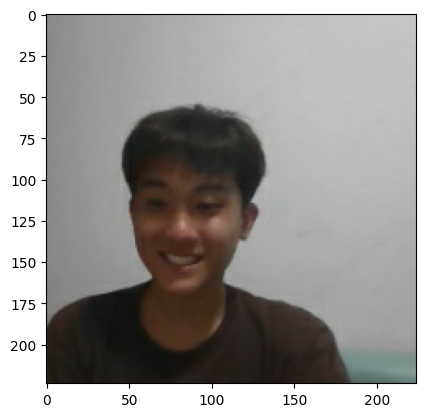

In [25]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
# **Lưu mô hình đã huấn luyện**
model = load_model('/content/nhandangkhuanmat_auto_split.h5')

# **Hàm dự đoán loài hoa**
def predict_flower(image_path):
  img = load_img(image_path, target_size=(224, 224))  # Đảm bảo kích thước ảnh giống với huấn luyện
  img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
  img_batch = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho phù hợp với đầu vào mô hình

  predictions = model.predict(img_batch)  # Dự đoán xác suất của các lớp
  predicted_class = np.argmax(predictions[0])  # Lấy lớp có xác suất cao nhất

  # Hiển thị kết quả dự đoán (tùy chỉnh theo tên lớp trong train_generator.class_indices)
  class_names = ['Minh đang cảm thấy buồn', 'Minh đang cảm thấy giận','Minh đang cảm thấy vui', 'Minh đang cảm thấy wow', 'Nghi đang cảm thấy buồn', 'Nghi đang cảm thấy giận', 'Nghi đang cảm thấy vui', 'Nghi đang cảm thấy wow']
  print('Dự đoán: {}'.format(class_names[predicted_class]))
  plt.imshow(img)
  plt.show()
# **Ví dụ sử dụng**
image_path = '/content/17.jpg'
predict_flower(image_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Dự đoán: Minh đang cảm thấy wow


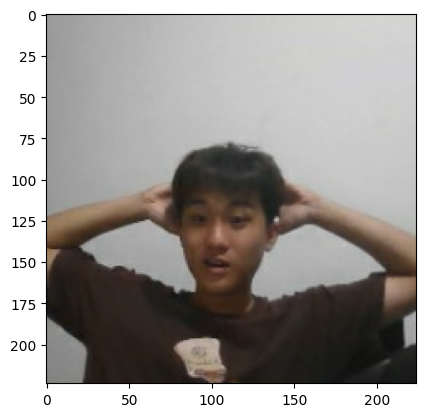

In [26]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
# **Lưu mô hình đã huấn luyện**
model = load_model('/content/nhandangkhuanmat_auto_split.h5')

# **Hàm dự đoán loài hoa**
def predict_flower(image_path):
  img = load_img(image_path, target_size=(224, 224))  # Đảm bảo kích thước ảnh giống với huấn luyện
  img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
  img_batch = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho phù hợp với đầu vào mô hình

  predictions = model.predict(img_batch)  # Dự đoán xác suất của các lớp
  predicted_class = np.argmax(predictions[0])  # Lấy lớp có xác suất cao nhất

  # Hiển thị kết quả dự đoán (tùy chỉnh theo tên lớp trong train_generator.class_indices)
  class_names = ['Minh đang cảm thấy buồn', 'Minh đang cảm thấy giận','Minh đang cảm thấy vui', 'Minh đang cảm thấy wow', 'Nghi đang cảm thấy buồn', 'Nghi đang cảm thấy giận', 'Nghi đang cảm thấy vui', 'Nghi đang cảm thấy wow']
  print('Dự đoán: {}'.format(class_names[predicted_class]))
  plt.imshow(img)
  plt.show()
# **Ví dụ sử dụng**
image_path = '/content/43.jpg'
predict_flower(image_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Dự đoán: Nghi đang cảm thấy buồn


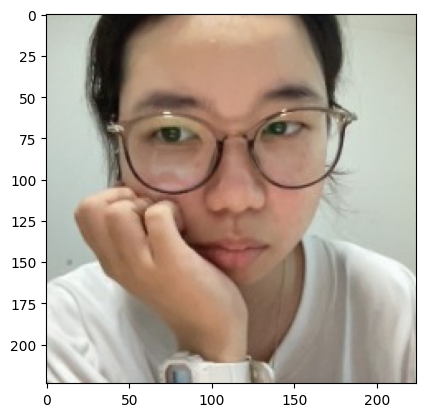

In [27]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
# **Lưu mô hình đã huấn luyện**
model = load_model('/content/nhandangkhuanmat_auto_split.h5')

# **Hàm dự đoán loài hoa**
def predict_flower(image_path):
  img = load_img(image_path, target_size=(224, 224))  # Đảm bảo kích thước ảnh giống với huấn luyện
  img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
  img_batch = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho phù hợp với đầu vào mô hình

  predictions = model.predict(img_batch)  # Dự đoán xác suất của các lớp
  predicted_class = np.argmax(predictions[0])  # Lấy lớp có xác suất cao nhất

  # Hiển thị kết quả dự đoán (tùy chỉnh theo tên lớp trong train_generator.class_indices)
  class_names = ['Minh đang cảm thấy buồn', 'Minh đang cảm thấy giận','Minh đang cảm thấy vui', 'Minh đang cảm thấy wow', 'Nghi đang cảm thấy buồn', 'Nghi đang cảm thấy giận', 'Nghi đang cảm thấy vui', 'Nghi đang cảm thấy wow']
  print('Dự đoán: {}'.format(class_names[predicted_class]))
  plt.imshow(img)
  plt.show()
# **Ví dụ sử dụng**
image_path = '/content/1.jpg'
predict_flower(image_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Dự đoán: Nghi đang cảm thấy giận


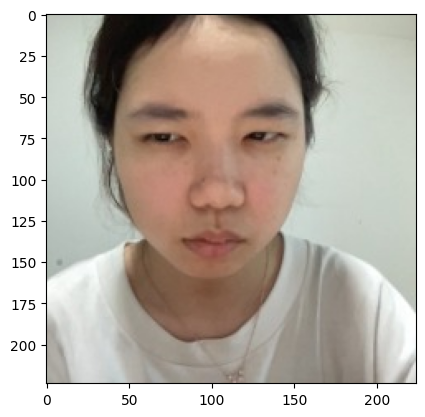

In [28]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
# **Lưu mô hình đã huấn luyện**
model = load_model('/content/nhandangkhuanmat_auto_split.h5')

# **Hàm dự đoán loài hoa**
def predict_flower(image_path):
  img = load_img(image_path, target_size=(224, 224))  # Đảm bảo kích thước ảnh giống với huấn luyện
  img_array = img_to_array(img) / 255.0  # Chuẩn hóa ảnh
  img_batch = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho phù hợp với đầu vào mô hình

  predictions = model.predict(img_batch)  # Dự đoán xác suất của các lớp
  predicted_class = np.argmax(predictions[0])  # Lấy lớp có xác suất cao nhất

  # Hiển thị kết quả dự đoán (tùy chỉnh theo tên lớp trong train_generator.class_indices)
  class_names = ['Minh đang cảm thấy buồn', 'Minh đang cảm thấy giận','Minh đang cảm thấy vui', 'Minh đang cảm thấy wow', 'Nghi đang cảm thấy buồn', 'Nghi đang cảm thấy giận', 'Nghi đang cảm thấy vui', 'Nghi đang cảm thấy wow']
  print('Dự đoán: {}'.format(class_names[predicted_class]))
  plt.imshow(img)
  plt.show()
# **Ví dụ sử dụng**
image_path = '/content/37.jpg'
predict_flower(image_path)